In [48]:
from ES import populational_isotropic_ES, populational_non_isotropic_ES, ESAlgorithm
import matplotlib.pyplot as plt
import numpy as np
from py_expression_eval import Parser
from functions_suganthan import zakharov_func
import decimal
parser = Parser()


## Comparação de resultados com critério de parada (erro)
### Comparação dos Algoritmos - função de zakharov com 10 dimensões


In [50]:
def f1(seed=0):
    experiment = {}

    def zakharov_wrapper(x:list):
        return zakharov_func(x, 10,  [], [], 0, 0)

    alg = ESAlgorithm()
    alg.set_evaluation_function(zakharov_wrapper)
    alg.set_num_dimensions(10)
    alg.set_global_variable_bounds(100, True, -100, True)
    alg.set_error_stop_criterion(1)
    alg.set_known_minimum(300)


    res_1 = alg.one_plus_one_ES_test(sigma=0.5, c=0.817, n=10, iter=80000, seed=seed)
    experiment['1p1'] = alg.get_evaluations_count() #res_1[-2:-1][0]['eval']

    res_2 = alg.populational_isotropic_ES_test(sigma_var=0.5, dimension_gen_interval=(-10, 10), iter=1000, seed=seed, num_parents=10, num_offspring=80)
    experiment['pi'] = alg.get_evaluations_count()  #res_2[0]['eval']

    res_3 = alg.populational_non_isotropic_ES_test(sigma_var=0.5, dimension_gen_interval=(-10, 10), iter=1000, seed=seed, num_parents=10, num_offspring=80)
    experiment['pni'] = alg.get_evaluations_count()  #res_3[0]['eval']

    return experiment


experiments = []
num_exp = 3
for i in range(num_exp):
    experiments.append(f1(i))

C:\Users\patri\AppData\Local\Temp\ipykernel_57084\1522038799.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


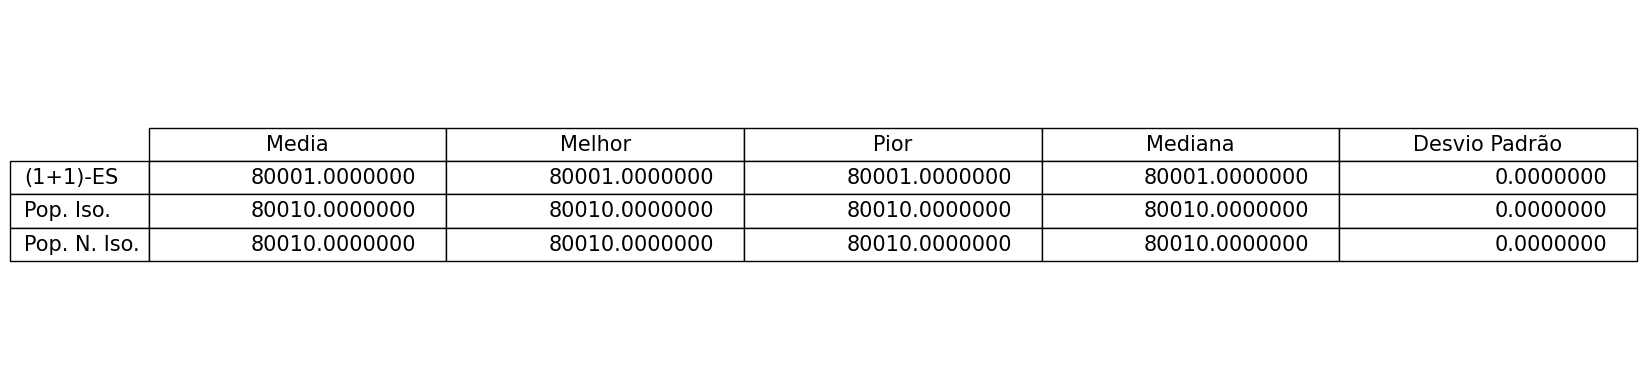

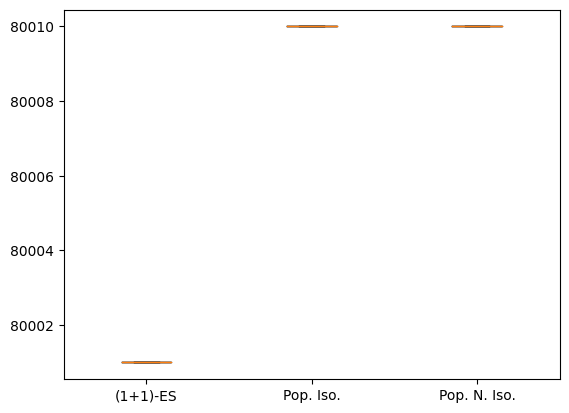

In [51]:

res_1p1 = [e['1p1'] for e in experiments]
res_pi = [e['pi'] for e in experiments]
res_pni = [e['pni'] for e in experiments]

tabela = [None, None, None]

def table_row(array):
    row = [f"{np.average(array):.7f}", f"{np.min(array):.7f}", f"{np.max(array):.7f}", f"{np.median(array):.7f}", f"{np.std(array):.7f}"]
    return row

tabela[0] = table_row(res_1p1)
tabela[1] = table_row(res_pi)
tabela[2] = table_row(res_pni)

fig, ax = plt.subplots()
# hide axes
fig.patch.set_visible(False)

ax.axis('off')
ax.axis('tight')
colLabels = ['Media', 'Melhor', 'Pior', 'Mediana', 'Desvio Padrão']
rowLabels = ["(1+1)-ES", "Pop. Iso.", "Pop. N. Iso."]
table = ax.table(tabela, colLabels=colLabels,rowLabels=rowLabels, loc='center')
table.scale(3,2)
table.set_fontsize(15)
fig.tight_layout()


fig_boxplot, ax_boxplot = plt.subplots()
ax_boxplot.boxplot(x=[res_1p1, res_pi, res_pni], labels=["(1+1)-ES", "Pop. Iso.", "Pop. N. Iso."])

plt.show()

### Comparação dos Algoritmos - função de zakharov com 20 dimensões

In [ ]:
def f1(seed=0):
    experiment = {}

    def zakharov_wrapper(x: list):
        return zakharov_func(x, 20, [], [], 0, 0)

    alg = ESAlgorithm()
    alg.set_evaluation_function(zakharov_wrapper)
    alg.set_num_dimensions(20)
    alg.set_global_variable_bounds(100, True, -100, True)
    alg.set_error_stop_criterion(0.0001)
    alg.set_known_minimum(300)


    res_1 = alg.one_plus_one_ES_test(sigma=0.5, c=0.817, n=10, iter=80000, seed=seed)
    experiment['1p1'] = alg.get_evaluations_count()  #res_1[-2:-1][0]['eval']

    res_2 = alg.populational_isotropic_ES_test(sigma_var=0.5, dimension_gen_interval=(-10, 10), iter=1000, seed=seed,num_parents=10, num_offspring=80)
    experiment['pi'] = alg.get_evaluations_count()  #res_2[0]['eval']

    res_3 = alg.populational_non_isotropic_ES_test(sigma_var=0.5, dimension_gen_interval=(-10, 10), iter=1000, seed=seed,num_parents=10, num_offspring=80)
    experiment['pni'] = alg.get_evaluations_count()  #res_3[0]['eval']

    return experiment


experiments = []
num_exp = 30
for i in range(num_exp):
    experiments.append(f1(i))

In [ ]:

res_1p1 = [e['1p1'] for e in experiments]
res_pi = [e['pi'] for e in experiments]
res_pni = [e['pni'] for e in experiments]

tabela = [None, None, None]


def table_row(array):
    row = [f"{np.average(array):.2f}", f"{np.min(array):.2f}", f"{np.max(array):.2f}", f"{np.median(array):.2f}", f"{np.std(array):.2f}"]
    return row


tabela[0] = table_row(res_1p1)
tabela[1] = table_row(res_pi)
tabela[2] = table_row(res_pni)

fig, ax = plt.subplots()
# hide axes
fig.patch.set_visible(False)

ax.axis('off')
ax.axis('tight')
colLabels = ['Media', 'Melhor', 'Pior', 'Mediana', 'Desvio Padrão']
rowLabels = ["(1+1)-ES", "Pop. Iso.", "Pop. N. Iso."]
table = ax.table(tabela, colLabels=colLabels, rowLabels=rowLabels, loc='center')
table.scale(3, 2)
table.set_fontsize(15)
fig.tight_layout()

fig_boxplot, ax_boxplot = plt.subplots()
ax_boxplot.boxplot(x=[res_1p1, res_pi, res_pni], labels=["(1+1)-ES", "Pop. Iso.", "Pop. N. Iso."])

plt.show()